In [1]:
import numpy as np
import torch
import ternary
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from ensemblecalibration.cal_estimates.kde_ece import ece_kde_obj, get_bandwidth
from ensemblecalibration.cal_estimates.skce import skce_obj
from ensemblecalibration.cal_estimates.brier import brier_obj
from ensemblecalibration.cal_estimates.mmd_kce import mmd_kce_obj

from ensemblecalibration.utils.helpers import multinomial_label_sampling, calculate_pbar   

# Visualization of Calibration Error Estimators

#### 1. Experiment:

As a first experiment, we ananlyse the estimators of different calibration errors. For ease of visualization,
we use the caseof $K=3$ predictors, and set 
$$\mathbb{P}(Y=k|X=x)= \begin{cases} \frac{1}{10}, k =1 \\
\frac{1}{10}, k=2 \\
\frac{8}{10}, k=3
\end{cases} \quad \forall x \in \mathcal{X}.$$
We then sample $N=1000$ labels from the defined distribution and for each point $p = (p_1, p_2, p_3)$,
we assume to have a constant predictor $f$ with $$f(x) \equiv p \quad \forall  x \in \mathcal{X}.$$ We then evaluate the calibration error based on the predicitons of $f$ and the labels $y_i$.

In [2]:
def miscalibration_estimate(p_probs, n_samples=1000, p_true = np.array([1/10, 1/10, 8/10]),
                             cal_estimate = "L2"):
    # Sample from the categorical distribution induced by the probability vector `p`
    if cal_estimate == "L2":
        params = {"p": 2, "bw": 0.1}
        miscal_obj = ece_kde_obj
    elif cal_estimate == "SKCE":
        params = {"bw": 0.01}
        miscal_obj = skce_obj
    elif cal_estimate == "Brier":
        params = {}
        miscal_obj = brier_obj
    elif cal_estimate == "MMD":
        params = {"bw": 0.001}
        miscal_obj = mmd_kce_obj
    else:
        raise ValueError("Invalid calibration estimate")
    p_true = np.tile(p_true, (n_samples, 1))
    y_labels = np.apply_along_axis(multinomial_label_sampling, 1, p_true)
    p_probs = np.tile(p_probs, (n_samples, 1))
    miscalibration = miscal_obj(p_probs, y_labels, params)
    return miscalibration

In [3]:

# Create a grid over the 3-simplex
scale = 40  # Resolution of the grid (higher value gives finer grid)
heatmap_data_brier = {}
heatmap_data_l2 = {}
heatmap_data_skce = {}
heatmap_data_mmd = {}

# Loop over all points in the simplex (each point represents a probability distribution)
for i in range(scale + 1):
    for j in range(scale + 1 - i):
        k = scale - i - j
        # Convert grid indices to a probability distribution
        p = np.array([i, j, k]) / scale
        # Evaluate the miscalibration function at this point
        heatmap_data_brier[(i, j)] = miscalibration_estimate(p, cal_estimate="Brier")
        heatmap_data_l2[(i, j)] = miscalibration_estimate(p, cal_estimate="L2")
        heatmap_data_skce[(i, j)] = miscalibration_estimate(p, cal_estimate="SKCE")
        heatmap_data_mmd[(i, j)] = miscalibration_estimate(p, cal_estimate="MMD")


p = [0. 0. 1.]


/Users/mirajuergens/Library/CloudStorage/OneDrive-UGent/Code/EnsembleCalibration/ensemblecalibration/cal_estimates/skce.py:165: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/miniforge3/conda-bld/libtorch_1719361022906/work/aten/src/ATen/native/TensorShape.cpp:3679.)
  h_ij = torch.matmul(y_ii.T, torch.matmul(gamma_ij, y_jj))


p = [0.    0.025 0.975]
p = [0.   0.05 0.95]
p = [0.    0.075 0.925]
p = [0.  0.1 0.9]
p = [0.    0.125 0.875]
p = [0.   0.15 0.85]
p = [0.    0.175 0.825]
p = [0.  0.2 0.8]
p = [0.    0.225 0.775]
p = [0.   0.25 0.75]
p = [0.    0.275 0.725]
p = [0.  0.3 0.7]
p = [0.    0.325 0.675]
p = [0.   0.35 0.65]
p = [0.    0.375 0.625]
p = [0.  0.4 0.6]
p = [0.    0.425 0.575]
p = [0.   0.45 0.55]
p = [0.    0.475 0.525]
p = [0.  0.5 0.5]
p = [0.    0.525 0.475]
p = [0.   0.55 0.45]
p = [0.    0.575 0.425]
p = [0.  0.6 0.4]
p = [0.    0.625 0.375]
p = [0.   0.65 0.35]
p = [0.    0.675 0.325]
p = [0.  0.7 0.3]
p = [0.    0.725 0.275]
p = [0.   0.75 0.25]
p = [0.    0.775 0.225]
p = [0.  0.8 0.2]
p = [0.    0.825 0.175]
p = [0.   0.85 0.15]
p = [0.    0.875 0.125]
p = [0.  0.9 0.1]
p = [0.    0.925 0.075]
p = [0.   0.95 0.05]
p = [0.    0.975 0.025]
p = [0. 1. 0.]
p = [0.025 0.    0.975]
p = [0.025 0.025 0.95 ]
p = [0.025 0.05  0.925]
p = [0.025 0.075 0.9  ]
p = [0.025 0.1   0.875]
p = [0.025 0.

/var/folders/mf/gnm849bj4fq5xnqhl_bdhf9m0000gn/T/ipykernel_23523/502639362.py:15: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  log_heatmap_data = {k: np.log(v) for k, v in data.items()}


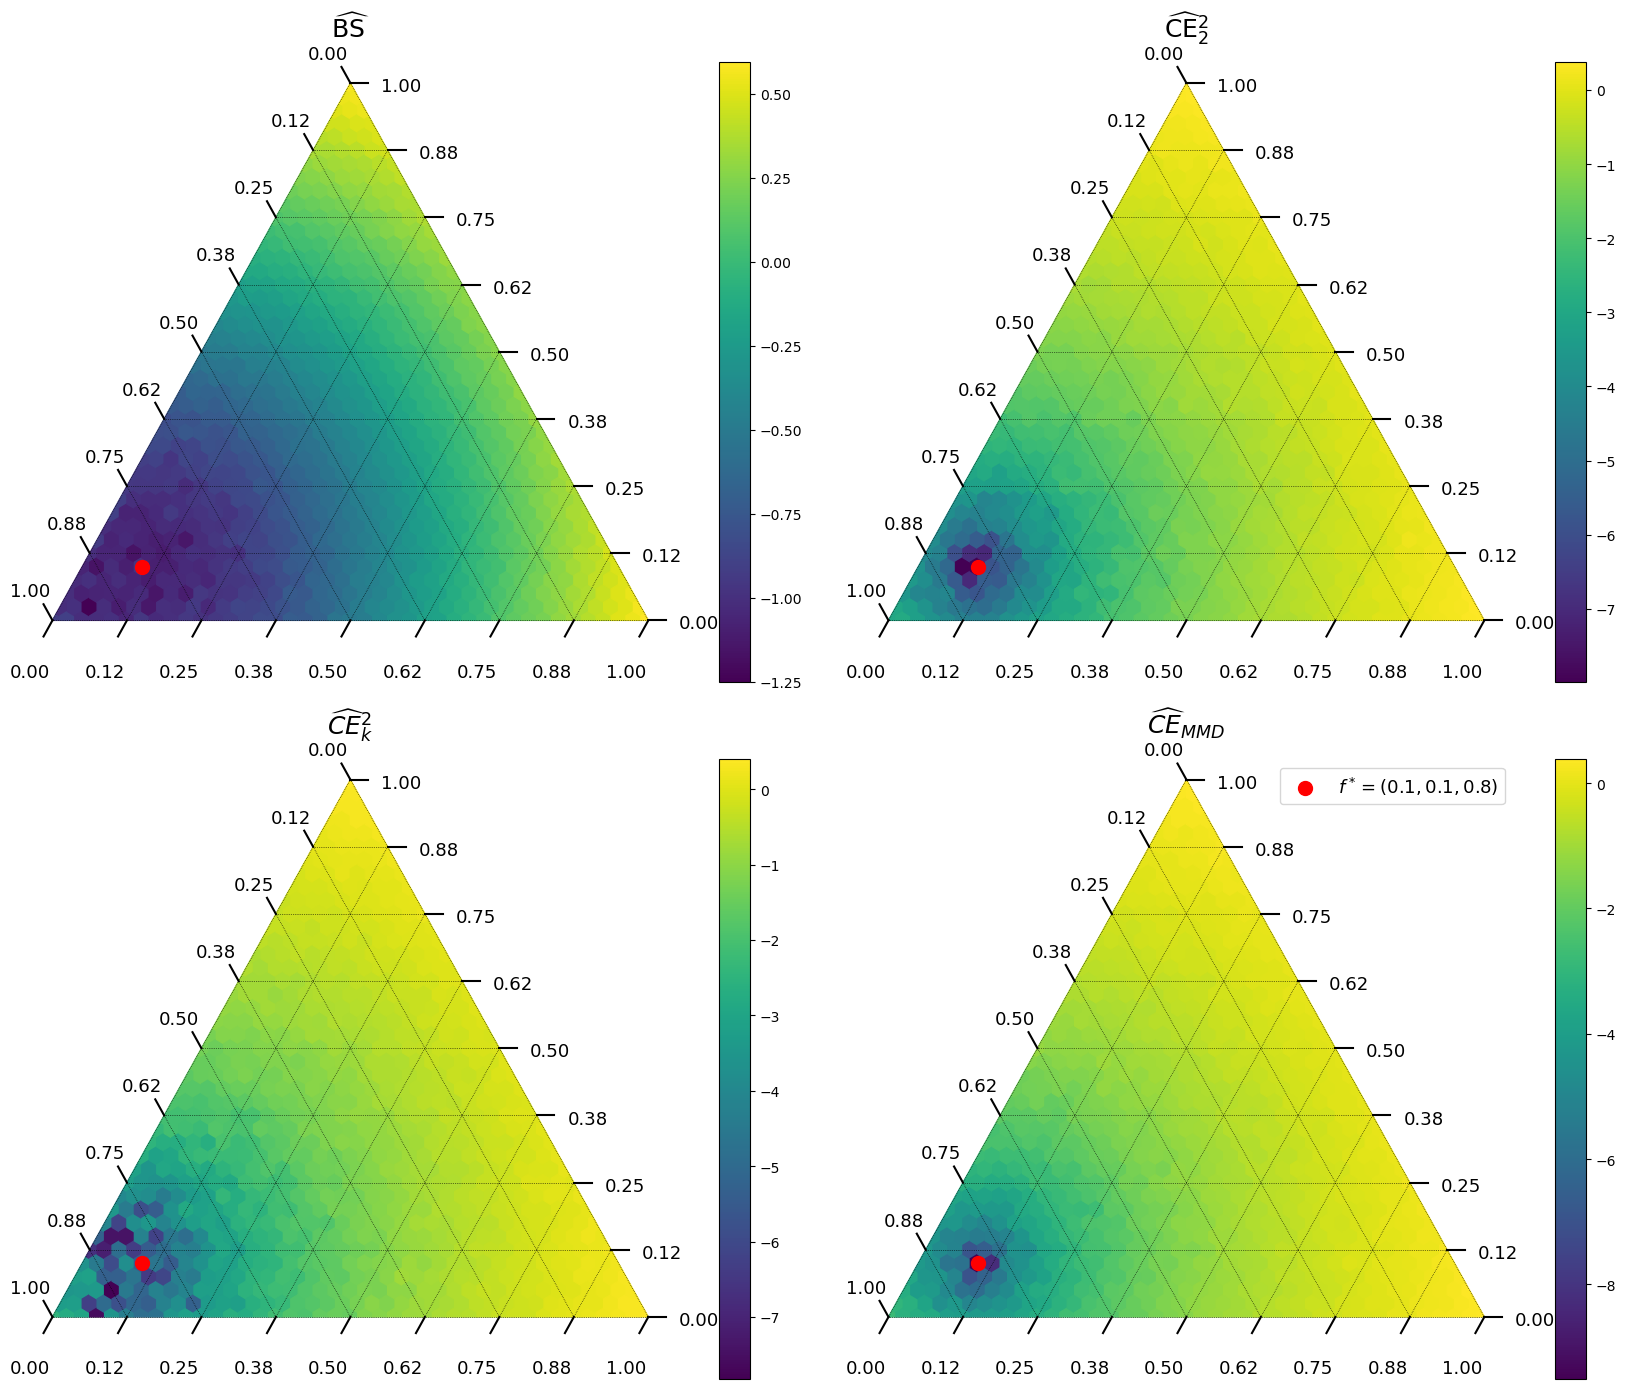

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(17, 14))
ax = ax.ravel()

for i, (data, title) in enumerate(
    zip(
        [heatmap_data_brier, heatmap_data_l2, heatmap_data_skce, heatmap_data_mmd],
        [r"$\widehat{\text{BS}}$", r"$\widehat{\text{CE}}_2^2$", r"$\widehat{CE}_k^2$", r"$\widehat{CE}_{MMD}$"],
    )
):
    ax[i].set_title(title, fontsize=18, pad=18)
    tax = ternary.TernaryAxesSubplot(ax=ax[i], scale=scale)
    tax.gridlines(multiple=5, color="black")

    #eps = 1e-10
    log_heatmap_data = {k: np.log(v) for k, v in data.items()}
    tax.heatmap(log_heatmap_data, scale=scale, style="hexagonal", cmap="viridis", colorbar=True)
    # change size of ticks of colorbar

    tick_multiple = 5  # Spacing between ticks in grid units
    tick_values = np.arange(0, scale+1, tick_multiple)  # Tick positions
    tick_labels = [f"{i/scale:.1f}" for i in tick_values]  # Normalized tick labels

    point = (1/10 * scale, 1/10 * scale, 8/10 * scale)

    # Plot the point in the simplex with a large marker size
    tax.scatter([point], marker='o', color='red', s=100, label="$f^* = (0.1, 0.1, 0.8)$")



    tax.set_axis_limits({'b': [0, 1], 'l': [0, 1], 'r': [0, 1]})
    tax.get_ticks_from_axis_limits(multiple=tick_multiple)
    tax.set_custom_ticks(tick_formats="%.2f", offset=0.03, fontsize=13)
    # Set ticks on the 'left', 'bottom', and 'right' axes with normalized labels
    # tax.ticks(
    #     axis='lbr',  # 'l' for left, 'b' for bottom, 'r' for right axis
    #     multiple=tick_multiple,  # Normalize tick values by dividing by scale
    #     offset=0.02,
    #     linewidth=1
    # )
    # Set ticks and titles
    #tax.ticks(axis='lbr', multiple=5)
    tax.clear_matplotlib_ticks()
    

    tax.get_axes().axis('off')
plt.legend(fontsize=13)


# Show the plot
plt.tight_layout()

plt.savefig("../figures/heatmap_cal_estimates.png", dpi=400)


    

### 2. Experiment


In [2]:
# we sample predictions from 3 ensemble members from a Dircihlet distribuiton, defiend by the following parameters
params_1 = np.array([1, 1, 5])
params_2 = np.array([1,5,1])
params_3 = np.array([5,1,1])

# we set the "true", i.e. calibrated convex combination to [0.1,0.1,0.8]
lambda_true = np.array([0.1, 0.1, 0.8])

# we sample 1000 predictions from each ensemble member
n_samples = 1000
preds_1 = np.random.dirichlet(params_1, n_samples)
preds_2 = np.random.dirichlet(params_2, n_samples)
preds_3 = np.random.dirichlet(params_3, n_samples)

# we compute the convex combination of the predictions
# first combine predictions in 1 tensor
preds = np.stack([preds_1, preds_2, preds_3], axis=2)

p_bar = calculate_pbar(lambda_true, preds, n_dims=1)

# sample labels according to the categorical distribution inudced by p_bar
y_labels = np.apply_along_axis(multinomial_label_sampling, 1, p_bar)


In [3]:
bw_ece_kde = get_bandwidth(torch.from_numpy(p_bar))
bw_ece_kde

tensor(1.0000e-05)

In [6]:
def miscalibration_lambda(
    lambda_prop: np.ndarray,
    preds: np.ndarray = preds,
    lambda_true: np.ndarray = lambda_true,
    cal_estimate="L2",
):
    # calculate the convex combination of the true underlying distribution
    p_bar_true = calculate_pbar(lambda_true, preds, n_dims=1)
    # sample the labels according to this distribution
    y_labels = np.apply_along_axis(multinomial_label_sampling, 1, p_bar_true)

    if cal_estimate == "L2":
        params = {"p": 2, "bw": 0.001}
        miscal_obj = ece_kde_obj
    elif cal_estimate == "SKCE":
        params = {"bw": 0.01}
        miscal_obj = skce_obj
    elif cal_estimate == "Brier":
        params = {}
        miscal_obj = brier_obj
    elif cal_estimate == "MMD":
        params = {"bw": 0.001}
        miscal_obj = mmd_kce_obj
    else:
        raise ValueError("Invalid calibration estimate")
    # calculate the convex combination of the proposed weight
    p_bar = calculate_pbar(lambda_prop, preds, n_dims=1)
    miscalibration = miscal_obj(p_bar, y_labels, params)
    return miscalibration

In [7]:
miscalibration_lambda(np.array([0.1, 0.05, 0.85]), cal_estimate="L2")

tensor(0.1060)

In [8]:
torch.diag(torch.finfo(torch.float).min * torch.ones(len(preds)))
torch.finfo(torch.float).min

-3.4028234663852886e+38

In [9]:
# Create a grid over the 3-simplex
scale = 40  # Resolution of the grid (higher value gives finer grid)
heatmap_data_brier_lambda = {}
heatmap_data_l2_lambda = {}
heatmap_data_skce_lambda = {}
heatmap_data_mmd_lambda = {}

# Loop over all points in the simplex (each point represents a probability distribution)
for i in range(scale + 1):
    for j in range(scale + 1 - i):
        k = scale - i - j
        # Convert grid indices to a probability distribution
        lambda_prop = np.array([i, j, k]) / scale
        # Evaluate the miscalibration function at this point
        heatmap_data_brier_lambda[(i, j)] = miscalibration_lambda(lambda_prop, cal_estimate="Brier")
        heatmap_data_l2_lambda[(i, j)] = miscalibration_lambda(lambda_prop, cal_estimate="L2")
        heatmap_data_skce_lambda[(i, j)] = miscalibration_lambda(lambda_prop, cal_estimate="SKCE")
        heatmap_data_mmd_lambda[(i, j)] = miscalibration_lambda(lambda_prop, cal_estimate="MMD")

/Users/mirajuergens/Library/CloudStorage/OneDrive-UGent/Code/EnsembleCalibration/ensemblecalibration/cal_estimates/skce.py:165: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/miniforge3/conda-bld/libtorch_1719361022906/work/aten/src/ATen/native/TensorShape.cpp:3679.)
  h_ij = torch.matmul(y_ii.T, torch.matmul(gamma_ij, y_jj))


/var/folders/mf/gnm849bj4fq5xnqhl_bdhf9m0000gn/T/ipykernel_23161/3437045377.py:16: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  log_heatmap_data = {k: np.log(v) for k, v in data.items()}


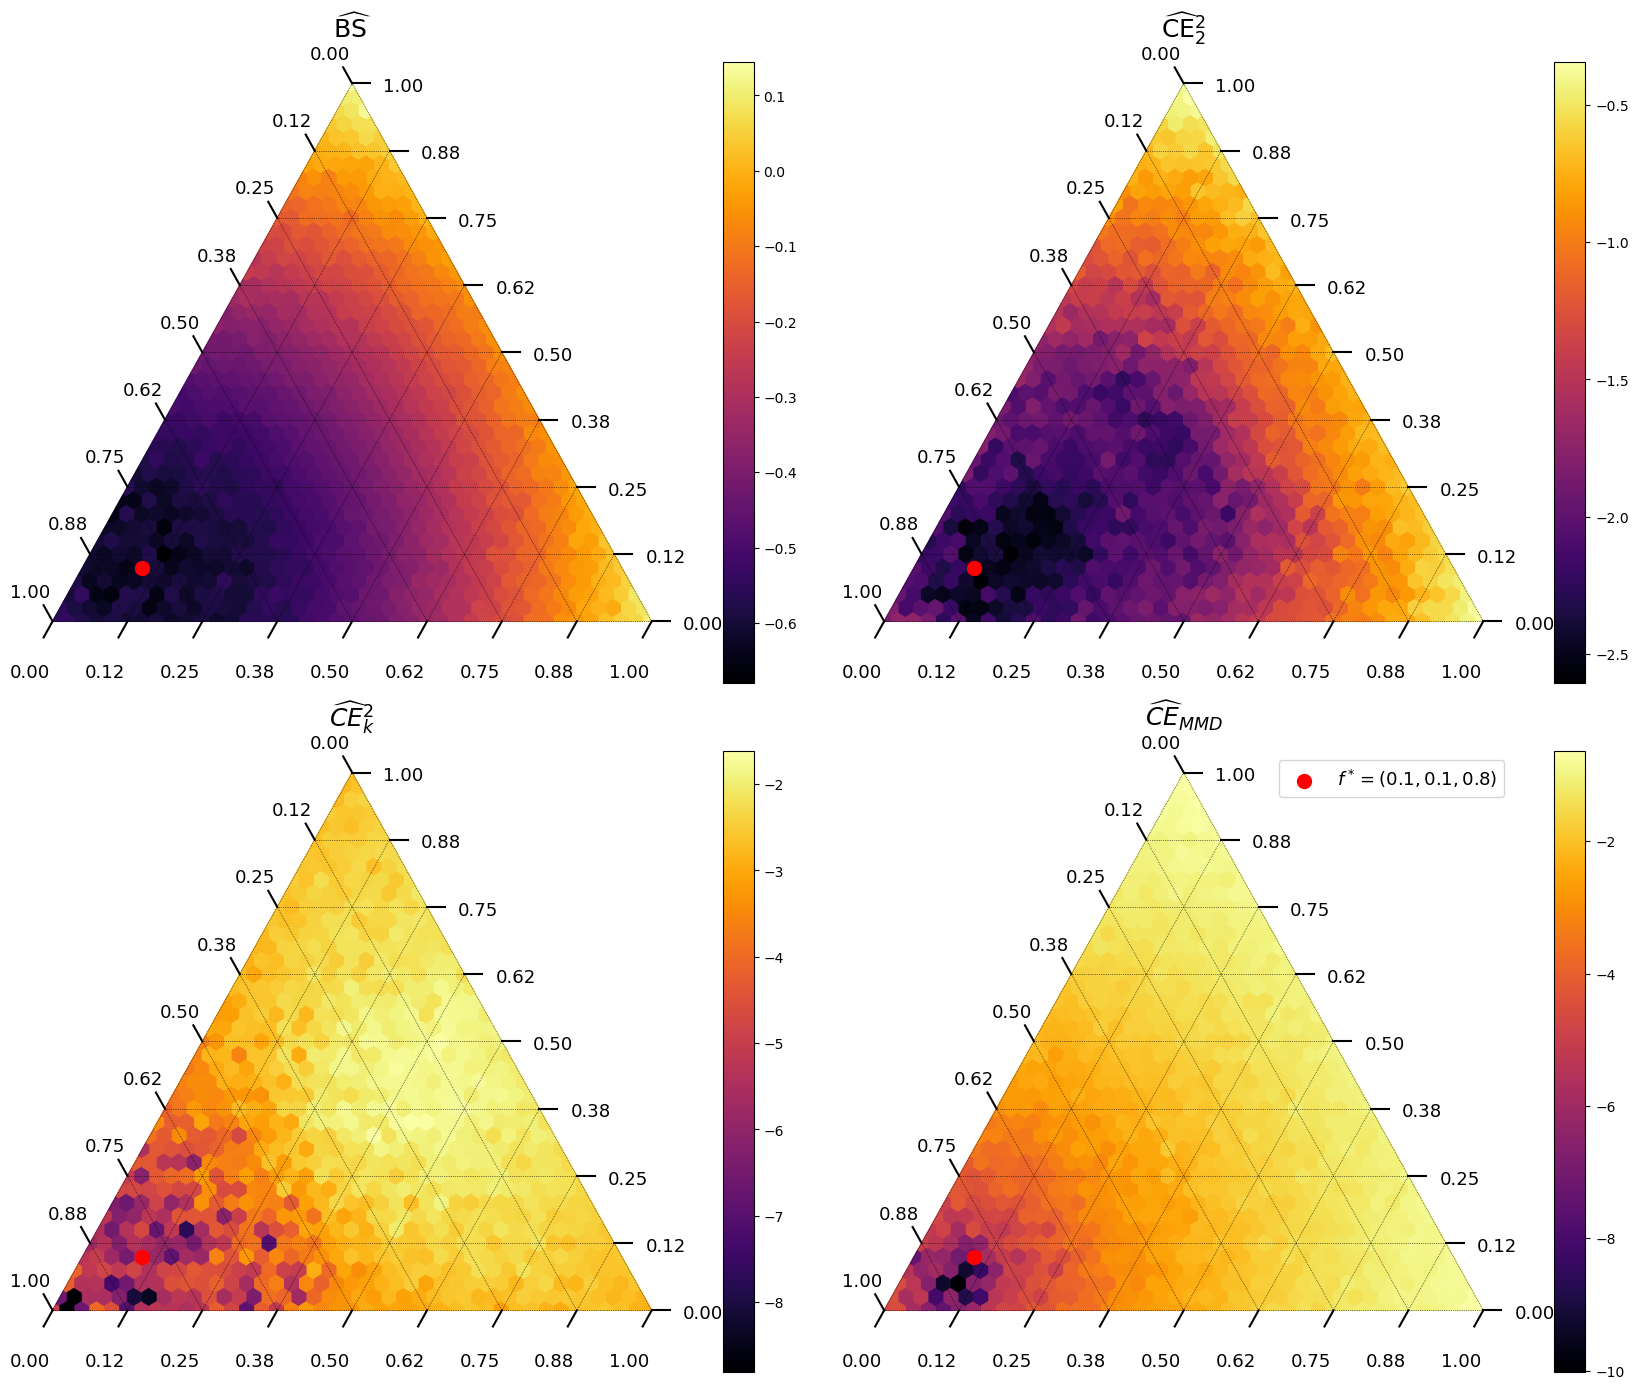

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(17, 14))
ax = ax.ravel()

for i, (data, title) in enumerate(
    zip(
        [heatmap_data_brier_lambda, heatmap_data_l2_lambda, heatmap_data_skce_lambda,
          heatmap_data_mmd_lambda],
        [r"$\widehat{\text{BS}}$", r"$\widehat{\text{CE}}_2^2$", r"$\widehat{CE}_k^2$", r"$\widehat{CE}_{MMD}$"],
    )
):
    ax[i].set_title(title, fontsize=18, pad=18)
    tax = ternary.TernaryAxesSubplot(ax=ax[i], scale=scale)
    tax.gridlines(multiple=5, color="black")

    #eps = 1e-10
    log_heatmap_data = {k: np.log(v) for k, v in data.items()}
    #use different cmap 
    cmap = "inferno"
    tax.heatmap(log_heatmap_data, scale=scale, style="hexagonal", cmap=cmap, colorbar=True)
    # change size of ticks of colorbar

    tick_multiple = 5  # Spacing between ticks in grid units
    tick_values = np.arange(0, scale+1, tick_multiple)  # Tick positions
    tick_labels = [f"{i/scale:.1f}" for i in tick_values]  # Normalized tick labels

    point = (1/10 * scale, 1/10 * scale, 8/10 * scale)

    # Plot the point in the simplex with a large marker size
    tax.scatter([point], marker='o', color='red', s=100, label="$f^* = (0.1, 0.1, 0.8)$")



    tax.set_axis_limits({'b': [0, 1], 'l': [0, 1], 'r': [0, 1]})
    tax.get_ticks_from_axis_limits(multiple=tick_multiple)
    tax.set_custom_ticks(tick_formats="%.2f", offset=0.03, fontsize=13)
    # Set ticks on the 'left', 'bottom', and 'right' axes with normalized labels
    # tax.ticks(
    #     axis='lbr',  # 'l' for left, 'b' for bottom, 'r' for right axis
    #     multiple=tick_multiple,  # Normalize tick values by dividing by scale
    #     offset=0.02,
    #     linewidth=1
    # )
    # Set ticks and titles
    #tax.ticks(axis='lbr', multiple=5)
    tax.clear_matplotlib_ticks()
    

    tax.get_axes().axis('off')
plt.legend(fontsize=13)


# Show the plot
plt.tight_layout()

plt.savefig("../figures/heatmap_cal_estimates_lambda.png", dpi=400)
